/var/folders/kx/bc9s5wpx43sgl75_fmyxqpjr0000gn/T/ipykernel_10268/1572498244.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


<AxesSubplot:xlabel='Datetime'>

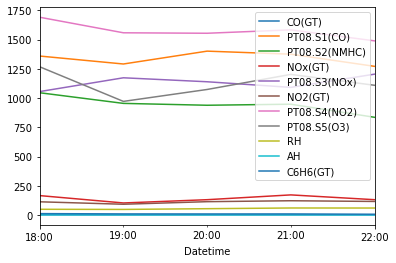

In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt

"""
Load AirQualityUCI Data
"""

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

input_file = './data/AirQualityUCI_refined.csv'

df = pd.read_csv(input_file,
                 index_col=[0],
                 parse_dates=[0],
                 date_parser=parser)

df.head().plot()

In [ ]:
!pip install pandas #판다스 버젼이슈때문에 에러가 나오는거같습니다.

<AxesSubplot:xlabel='Datetime'>

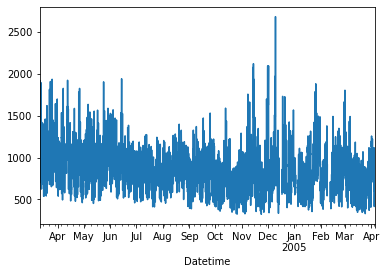

In [2]:
df['PT08.S3(NOx)'].plot()

In [3]:
p=df['PT08.S3(NOx)'].copy()
p.interpolate(inplace=True)

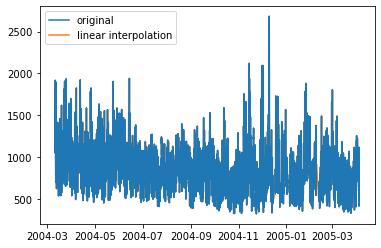

In [4]:
plt.plot(df['PT08.S3(NOx)'], label='original', zorder=2)
plt.plot(p, label='linear interpolation', zorder=1)
plt.legend(loc='best')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc4a879e880>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc4a879ee20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc4a879e5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc4d8e3e400>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc4d8e3e6d0>],
 'means': []}

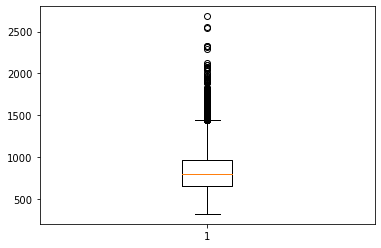

In [5]:
plt.boxplot(p)

In [6]:
corr_matrix=df.corr()
corr_matrix

,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
CO(GT),1.000000,0.877203,0.914973,0.792557,-0.701703,0.679262,0.639470,0.851403,0.040218,0.065809,0.845144
PT08.S1(CO),0.877203,1.000000,0.892964,0.713654,-0.771938,0.641529,0.682881,0.899324,0.114606,0.135324,0.883795
PT08.S2(NMHC),0.914973,0.892964,1.000000,0.704435,-0.796703,0.646245,0.777254,0.880578,-0.090380,0.186933,0.981950
NOx(GT),0.792557,0.713654,0.704435,1.000000,-0.655707,0.763111,0.233731,0.787046,0.221032,-0.149323,0.626638
PT08.S3(NOx),-0.701703,-0.771938,-0.796703,-0.655707,1.000000,-0.652083,-0.538468,-0.796569,-0.056740,-0.232017,-0.735744
NO2(GT),0.679262,0.641529,0.646245,0.763111,-0.652083,1.000000,0.157360,0.708128,-0.091759,-0.335022,0.544039
PT08.S4(NO2),0.639470,0.682881,0.777254,0.233731,-0.538468,0.157360,1.000000,0.591144,-0.032188,0.629641,0.765731
PT08.S5(O3),0.851403,0.899324,0.880578,0.787046,-0.796569,0.708128,0.591144,1.000000,0.124956,0.070751,0.865689
RH,0.040218,0.114606,-0.090380,0.221032,-0.056740,-0.091759,-0.032188,0.124956,1.000000,0.167971,-0.061681
AH,0.065809,0.135324,0.186933,-0.149323,-0.232017,-0.335022,0.629641,0.070751,0.167971,1.000000,0.167972


In [7]:
rh = df['RH'].copy().interpolate()

Text(0.5, 1.0, 'Detecting outliers using Boxplot')

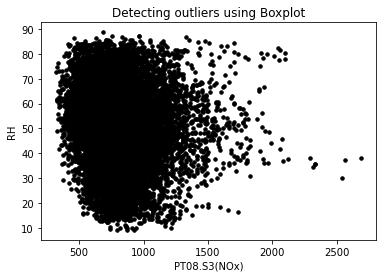

In [8]:
plt.scatter(p, rh, s=12, c='black')
plt.xlabel('PT08.S3(NOx)')
plt.ylabel('RH')
plt.title("Detecting outliers using Boxplot")

In [9]:
nmhc = df['PT08.S2(NMHC)'].copy().interpolate()

Text(0, 0.5, 'NMHC')

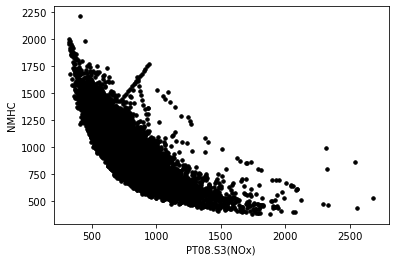

In [10]:
plt.scatter(p, nmhc, s=12, c='black')
plt.xlabel('PT08.S3(NOx)')
plt.ylabel("NMHC")

In [11]:
q1=p.quantile(0.25)
median=p.quantile(0.5)
q3=p.quantile(0.75)
print(q1,median,q3)

654.0 804.0 968.0


In [12]:
iqr=q3-q1
upper_fence=q3+1.5*iqr
lower_fence=q1-1.5*iqr
print(iqr, upper_fence, lower_fence)

314.0 1439.0 183.0


In [13]:
outliers=p.loc[(p>upper_fence)| (p<0)]
print(outliers)

Datetime
2004-03-11 00:00:00    1462.0
2004-03-11 01:00:00    1453.0
2004-03-11 02:00:00    1579.0
2004-03-11 03:00:00    1705.0
2004-03-11 04:00:00    1818.0
                        ...  
2005-03-01 03:00:00    1791.0
2005-03-01 04:00:00    1804.0
2005-03-01 05:00:00    1727.0
2005-03-01 06:00:00    1677.0
2005-03-07 04:00:00    1490.0
Name: PT08.S3(NOx), Length: 239, dtype: float64


In [14]:
mask=outliers.index.isin(outliers.index)[:60]
print(mask)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


In [ ]:
pip install --upgrade pandas==0.19.2

In [15]:
p[~mask] #row 와 boolean list 의 길이가 같아야 하는데 구글검색을 해봐도 어떻게 해결해야 될지 모르겠습니다...

IndexError: Boolean index has wrong length: 60 instead of 9357

In [21]:
plt.plot(p[~mask], label='normal', color='blue',
    marker='o', markersize=3, linestyle='None')
plt.plot(outliers, label='outliers', color='red',
    marker='x', markersize=3, linestyle='None')
plt.legend(loc='best')

IndexError: Boolean index has wrong length: 60 instead of 9357

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PT08.S3(NOx)', ylabel='Density'>

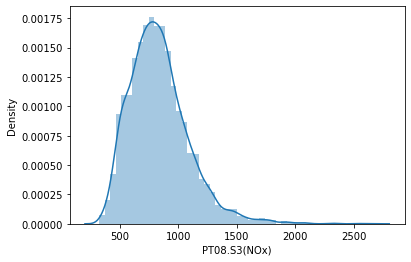

In [18]:
import seaborn as sns
sns.distplot(p)

In [19]:
mean=np.mean(p)
std=np.std(p)
print(mean,std)

832.7588970823982 255.69616900657363


In [20]:
outliers=[]
thres=3

for i in p:
    z_score=(i-mean)/std
    if (np.abs(z_score)>thres):
        print(z_score)
        outliers.append(i)

3.4112404042126165
3.8531711552247483
4.244260315412475
3.5402998270745667
3.3134681141656848
4.146488025365544
4.154309808569298
3.3330225721750715
3.0788146180530487
3.833616697215362
3.6106958759083576
3.7280226239646757
3.395596837805108
4.205151399393703
3.419062187416371
4.310745472644389
3.0162403524230124
3.168765124896226
3.051438376839908
3.387775054601353
3.5833196346952167
3.8844582880397667
3.4112404042126165
3.0592601600436624
3.8688147216322575
4.2638147734218625
3.6106958759083576
3.051438376839908
3.716289949159044
3.462081995037021
3.4777255614445304
3.8844582880397667
3.137477992081208
3.098369076062435
3.8101513476040982
4.189507832986194
3.794507781196589
3.763220648381571
4.334210822255653
4.240349423810598
3.4034186210088624
3.6146067675102347
3.254804740137526
3.0045076776173807
3.2469829569337714
3.168765124896226
3.6693592499365164
4.8660920801109615
4.807428706082803
4.424161329098831
3.7553988651778165
3.2508938485356484
3.4542602118332666
5.038171310593562


In [29]:
out=p.loc[np.abs((p-mean)/std)>3]
print(out)

Datetime
2004-03-11 03:00:00    1705.0
2004-03-11 04:00:00    1818.0
2004-03-11 05:00:00    1918.0
2004-03-11 06:00:00    1738.0
2004-03-12 03:00:00    1680.0
                        ...  
2005-02-28 06:00:00    1665.0
2005-03-01 03:00:00    1791.0
2005-03-01 04:00:00    1804.0
2005-03-01 05:00:00    1727.0
2005-03-01 06:00:00    1677.0
Name: PT08.S3(NOx), Length: 111, dtype: float64


In [30]:
mask=p.index.isin(out.index)
mask[:50]

array([False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


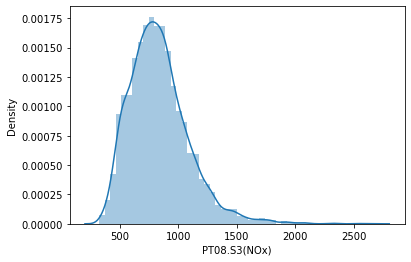

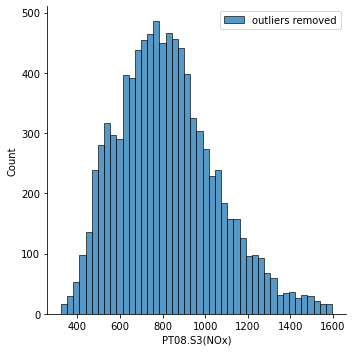

In [31]:
sns.distplot(p, axlabel='PT08.S3(NOx)',label='original')
sns.displot(p[~mask], label='outliers removed')
plt.legend(loc='best')